Bölüm 1: Proje Tanımı ve Kütüphane Kurulumu.
Bu bölümde, veri manipülasyonu, görselleştirme ve makine öğrenmesi için gerekli araçları projemize dahil ediyoruz.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku
df = pd.read_csv('../data/german_credit_data.csv', index_col=0)

# Verinin ilk 5 satırını ve genel bilgilerini göster
print("Veri Seti Özeti:")
display(df.info())
display(df.head())

Veri Seti Özeti:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


None

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Bölüm 2:Keşifçi Veri Analizi (EDA).
Bu adımda ham veriyi okuyor ve verinin yapısını (sütunlar, eksik değerler, veri tipleri) inceliyoruz.

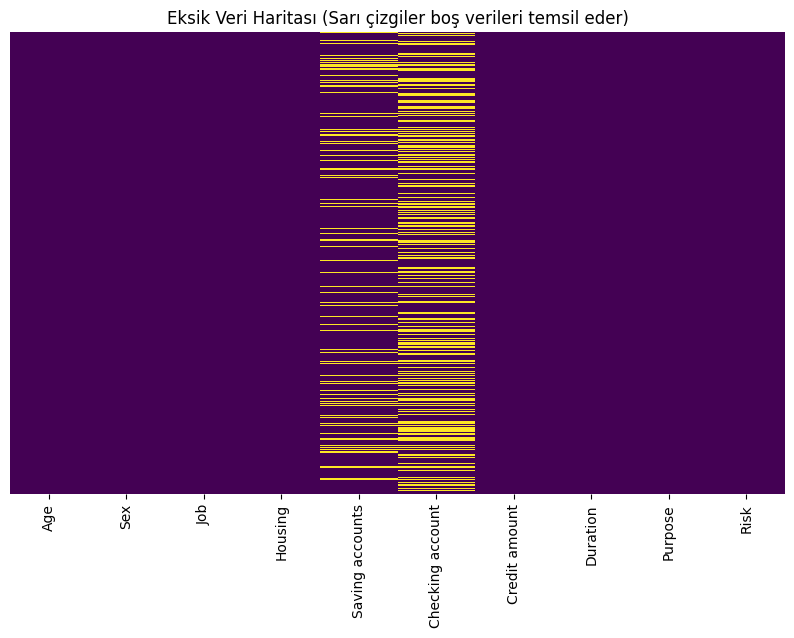

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Eksik Veri Haritası (Sarı çizgiler boş verileri temsil eder)')
plt.show()

Bölüm 3: Veri Ön İşleme (Data Preprocessing).
Eksik verileri dolduruyor ve kategorik (metin) verileri, makine öğrenmesi algoritmalarının işleyebileceği sayısal formatlara dönüştürüyoruz.

In [20]:
# Eksik değerleri 'Bilinmiyor' (unknown) ile dolduralım
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

# Kontrol edelim, hala boş yer kaldı mı?
print(df.isnull().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


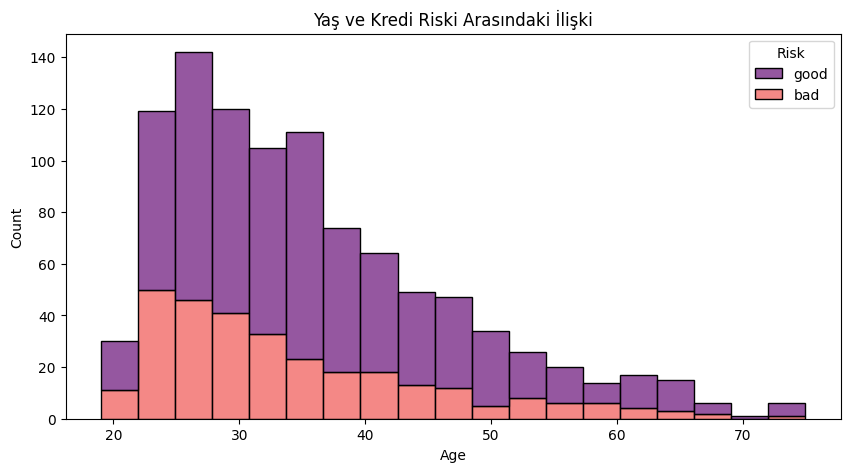

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Risk', multiple='stack', palette='magma')
plt.title('Yaş ve Kredi Riski Arasındaki İlişki')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluşturalım
le = LabelEncoder()

# İkili (Binary) kategorileri dönüştürelim
df['Sex'] = le.fit_transform(df['Sex']) # male: 1, female: 0
df['Risk'] = le.fit_transform(df['Risk']) # bad: 0, good: 1 

# Housing ve Purpose gibi çok seçenekli olanları da sayıya çevirelim
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df['Purpose'] = le.fit_transform(df['Purpose'])

print("Veri setinin son hali (Hepsi sayı olmalı):")
display(df.head())

Veri setinin son hali (Hepsi sayı olmalı):


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


Bölüm 4: Model Eğitimi ve Hiperparametre Optimizasyonu.
Veriyi eğitim ve test olarak ayırıp, en iyi parametreleri bulmak için GridSearchCV kullanıyoruz.

In [23]:
from sklearn.model_selection import train_test_split

# Hedef değişken (y) ve özellikler (X)
X = df.drop('Risk', axis=1) # Risk dışındaki her şey tahmin için girdi
y = df['Risk'] # Tahmin edilecek olan sonuç

# %80 Eğitim, %20 Test olacak şekilde bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Eğitim seti boyutu: (800, 9)
Test seti boyutu: (200, 9)


Bölüm 5: Performans Değerlendirmesi.
Modelin hiç görmediği veriler üzerindeki başarısını ölçüyoruz.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli tanımlayalım
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verileriyle eğitelim
model.fit(X_train, y_train)

# Test verileriyle tahmin yapalım
y_pred = model.predict(X_test)

# Sonuçları yazdıralım
print(f"Modelin Başarı Oranı (Accuracy): %{accuracy_score(y_test, y_pred)*100:.2f}")
print("\nDetaylı Rapor:")
print(classification_report(y_test, y_pred))

Modelin Başarı Oranı (Accuracy): %77.00

Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.68      0.42      0.52        59
           1       0.79      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200



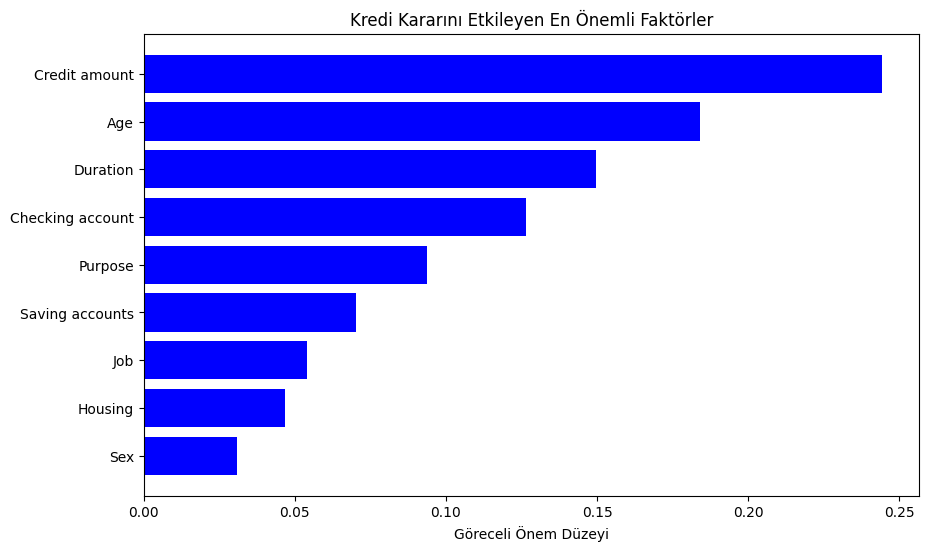

In [25]:
# Hangi özelliklerin model için daha önemli olduğunu görelim
import numpy as np

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Kredi Kararını Etkileyen En Önemli Faktörler')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Göreceli Önem Düzeyi')
plt.show()

In [26]:
# Hayali bir müşteri verisi (X_train sütun sırasıyla aynı olmalı)
# Örn: [Age, Sex, Job, Housing, Saving accounts, Checking account, Purpose, Credit amount, Duration]
yeni_musteri = [[25, 1, 2, 1, 0, 0, 1, 5000, 24]] 

tahmin = model.predict(yeni_musteri)
olasilik = model.predict_proba(yeni_musteri)

if tahmin[0] == 1:
    print(f"SONUÇ: GÜVENLİ (Good Credit) - Olasılık: %{olasilik[0][1]*100:.2f}")
else:
    print(f"SONUÇ: RİSKLİ (Bad Credit) - Olasılık: %{olasilik[0][0]*100:.2f}")

SONUÇ: RİSKLİ (Bad Credit) - Olasılık: %59.00


c:\Users\suden\OneDrive\Masaüstü\Credit_Risk_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\suden\OneDrive\Masaüstü\Credit_Risk_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.model_selection import GridSearchCV

# Denemek istediğimiz parametreleri belirliyoruz
param_grid = {
    'n_estimators': [50, 100, 200],      # Ormandaki ağaç sayısı
    'max_depth': [None, 10, 20, 30],      # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],      # Bir düğümü bölmek için gereken min örnek sayısı
    'criterion': ['gini', 'entropy']      # Saflık ölçütü
}

# Modeli ve GridSearchCV'yi tanımlayalım
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [28]:
# Aramayı başlatalım
grid_search.fit(X_train, y_train)

# En iyi parametreleri görelim
print("En İyi Parametreler:", grid_search.best_params_)

# En iyi modelle tahmin yapalım
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f"Yeni Başarı Oranı: %{accuracy_score(y_test, y_pred_best)*100:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
En İyi Parametreler: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Yeni Başarı Oranı: %76.50
